 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


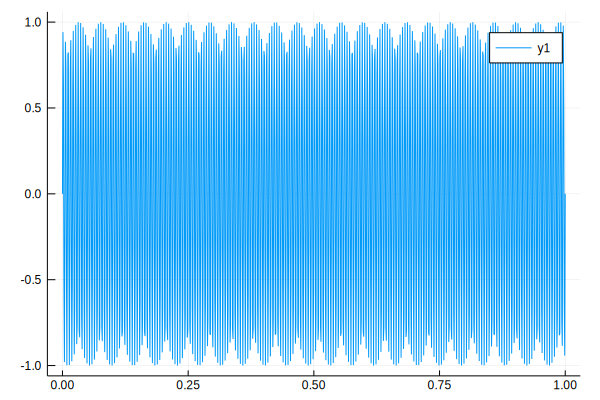

In [275]:
Pkg.add("FFTW")
Freq = 1024
Pts = 0:1/(Freq-1):1
using(Plots)
Values= sin.(2*pi*Pts*200)
plot(Pts, Values)

In [276]:
using FFTW
y=fft(Values)

1024-element Array{Complex{Float64},1}:
  5.218048215738236e-14 + 0.0im                  
  1.3347887720671636e-5 - 0.0043507213858283295im
   5.339558898209695e-5 - 0.008702018832949424im 
 0.00012015521804265017 - 0.013054468689263438im 
 0.00021364697629788765 - 0.01740864787475374im  
  0.0003338991669802338 - 0.021765134171590844im 
  0.0004809482163419254 - 0.026124506508033274im 
  0.0006548387016591661 - 0.03048734525091712im  
  0.0008556233822289983 - 0.034854232495481696im 
  0.0010833632430690132 - 0.03922575235784542im  
  0.0013381275373085533 - 0.04360249127059146im  
  0.0016199938400546232 - 0.04798503827830425im  
  0.0019290481075099342 - 0.05237398534063109im  
                        ⋮                        
  0.0019290481075107113 + 0.05237398534063198im  
   0.001619993840058065 + 0.047985038278303804im 
  0.0013381275373096635 + 0.04360249127059346im  
  0.0010833632430706785 + 0.039225752357840094im 
  0.0008556233822289983 + 0.03485423249547637im  
  0.000654

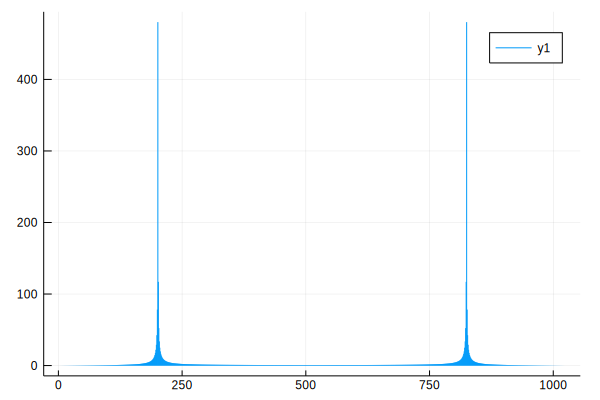

In [277]:
sticks(abs.(y))

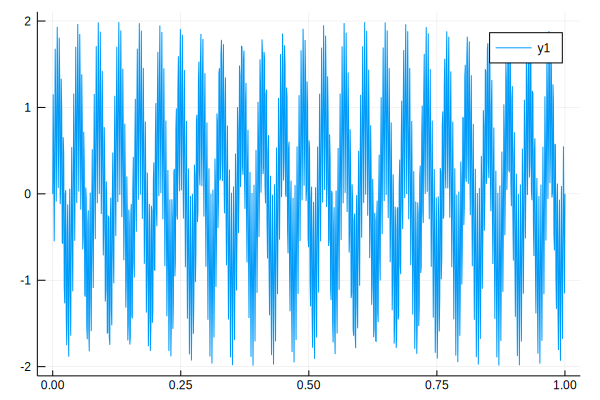

In [278]:
SignalsSum = (sin.(2*pi*Pts*25) + sin.(2*pi*Pts*250))
plot(Pts, SignalsSum)

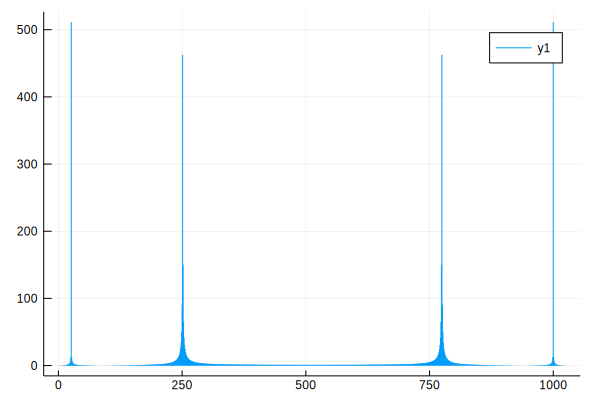

In [279]:
SumFFT=fft(SignalsSum)
sticks(abs.(SumFFT))

In [280]:
SignalNoised = (sin.(2*pi*Pts*100) + sin.(2*pi*Pts*250)) + rand(Float64, 1024)/2

1024-element Array{Float64,1}:
  0.2322831079277372 
  1.7325866866659712 
  1.4873890597963568 
  0.36749782911375106
  0.6927149566318634 
  1.1700992680487141 
 -0.05453371906571869
 -1.5936849068875583 
 -0.8783419901659327 
  0.4101647731291741 
  0.41409469305487745
 -0.1521937825095071 
  0.5734909644064641 
  ⋮                  
  0.8004819548063075 
  0.2873744540252071 
  0.1885461932594985 
  1.6043563897921747 
  2.0527983396202663 
  0.7843099184856159 
 -0.7938554543443253 
 -0.38844885313490674
  0.3413923004509257 
 -0.6255020188358154 
 -1.3023305973294526 
  0.3657582927464662 

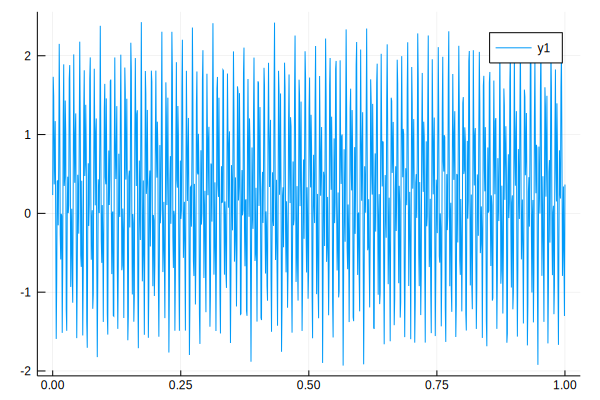

In [281]:
plot(Pts, SignalNoised)

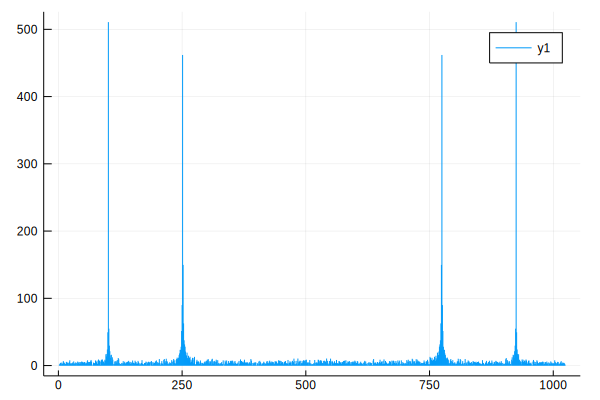

In [292]:
NoiseFFT=fft(SignalNoised)
NoiseFFT[1]=0
sticks(abs.(NoiseFFT))

In [312]:
function cutNoise(x)
    if x<0
        0
    else
        x
    end
end

cutNoise (generic function with 1 method)

In [313]:
ReducedNoise=map(cutNoise, abs.(NoiseFFT))

1024-element Array{Float64,1}:
 0.0               
 1.2977217594273815
 2.4816964056983704
 3.8858874521219695
 4.074150354983135 
 1.5458274139377979
 4.462051514526972 
 2.299933421180582 
 2.998916780894895 
 6.623082593689328 
 4.869408882517778 
 3.8842658350933226
 2.0112605033608175
 ⋮                 
 2.011260503360818 
 3.884265835093323 
 4.869408882517779 
 6.623082593689326 
 2.9989167808948953
 2.299933421180583 
 4.462051514526989 
 1.5458274139377932
 4.074150354983132 
 3.8858874521219686
 2.4816964056983704
 1.2977217594273824

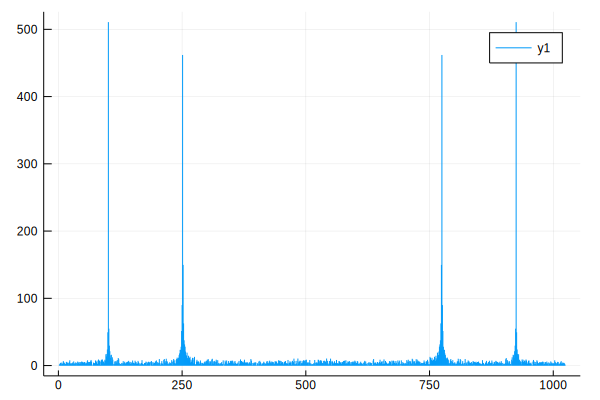

In [314]:
sticks(ReducedNoise)

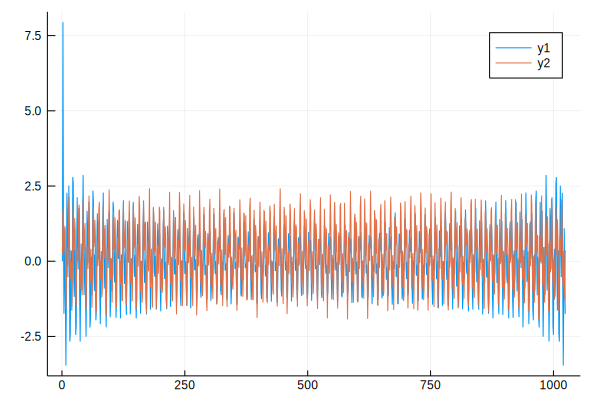

In [315]:
InvertedReducedNoise = ifft(ReducedNoise)
plot(shiftArray(real(InvertedReducedNoise), 1))
plot!(SignalNoised)

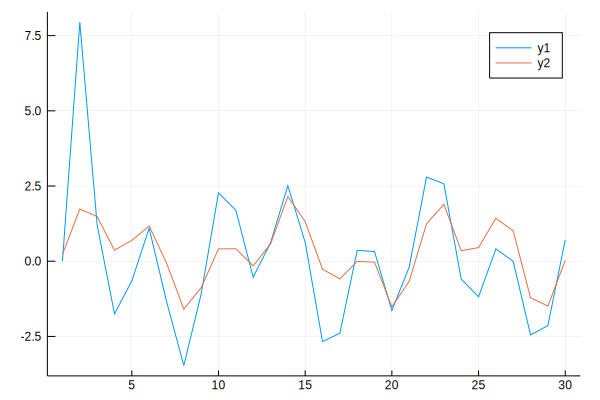

In [316]:
plot(shiftArray(real(InvertedReducedNoise[1:30]), 1))
plot!(SignalNoised[1:30])

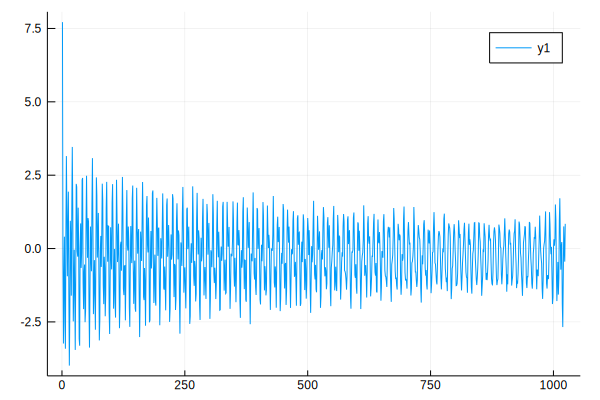

In [317]:
plot(real(InvertedReducedNoise)-SignalNoised)

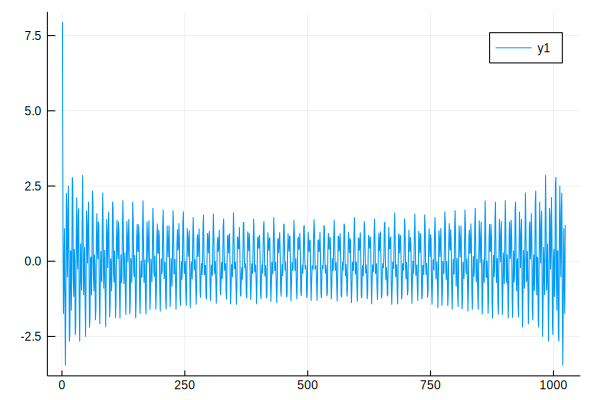

In [318]:
plot(real(InvertedReducedNoise))

In [319]:
function shiftArray(arr, dist)
    resultArray = zeros(size(arr, 1))
    for i in 1:1:size(arr, 1)-dist
        resultArray[i+dist]=arr[i]
    end
    resultArray
end
        

shiftArray (generic function with 1 method)

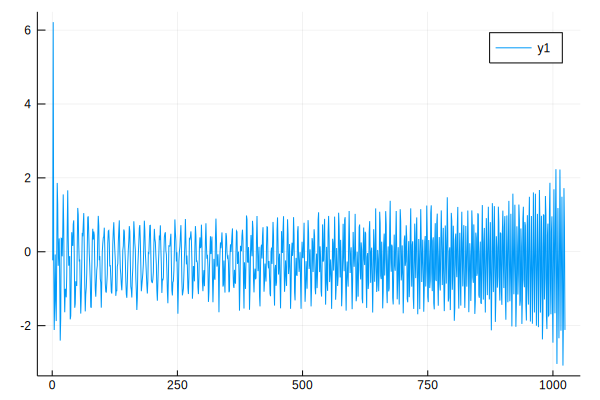

In [321]:
plot(shiftArray(real(InvertedReducedNoise), 1)-SignalNoised)